# Amazon Prime Video Analysis

### There are about 4000+ rows and 16 columns. cvt_per_day is a measure on how much a movie is consumed by the audiences per day. Higher number means the movie is more popular on Amazon Vidoe platform. 

* The project tryied to answer two questions:
    - Find out whether a movie is going to perform well on the platform (KPI: cvt_per_day) based on the information in the dataset.
    - What models used, any particular insights or other thoughts on the dataset.

### RMSE is chosen as loss function. Model used for prediction includes: 
Linear Regression, Decision Tree Regressor, Random Forest Regressor, AdaBoost Regressor, Gradient Boosting Regressor. 
   - Decision Tree Regressor has lowest RMSE after Grid Search for best estimators.
   - Categorical Position, Horizontal Position and imdb Votes are the top 3 important features for all top 3 models. While Categorical Position shows the dominant importance. 

## Colusion:
   - Movies appeared on the first position in each categorical tends to attract much more viewers than the rest. It may raise the issue as "the rich get richer". Some good movies at a later position most of the time is very difficult to be noticed. We can use recommendation system to pop out different movies for each customer.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_table('TVdata.txt', header = 0, sep = ',')

In [4]:
data.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    4226 non-null float64
dtypes: float64(4), int64(8), obj

In [170]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

C:\Users\lehe2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,16
Number of observations,4226
Total Missing (%),0.0%
Total size in memory,528.4 KiB
Average record size in memory,128.0 B
Numeric,12
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## 2. Exploratory Data Analysis

<AxesSubplot:xlabel='weighted_categorical_position', ylabel='cvt_per_day'>

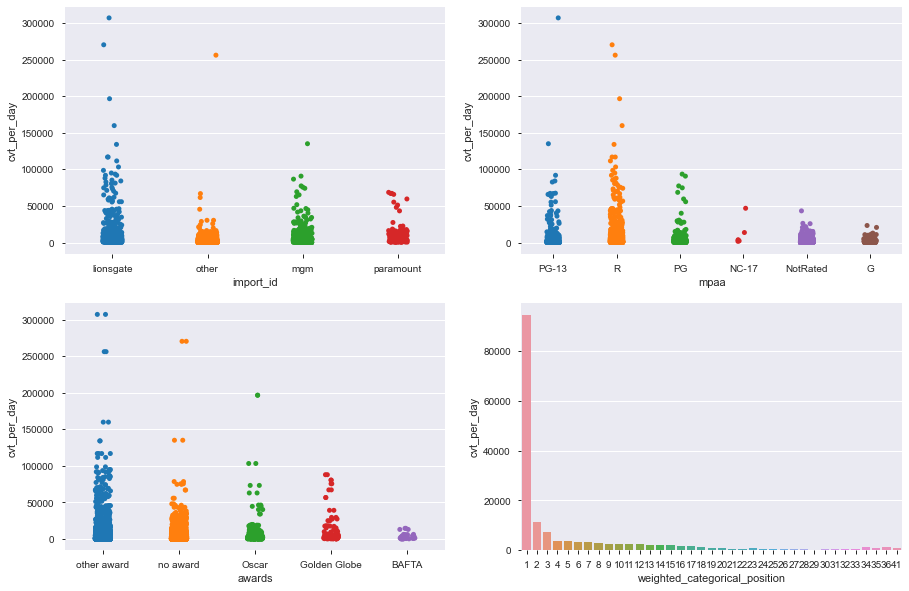

In [19]:
fig, ax = plt.subplots(2,2,figsize = (15, 10))
sns.stripplot(x='import_id', y='cvt_per_day', data=data,jitter=True, ax = ax[0,0])

sns.stripplot(x='mpaa', y='cvt_per_day', data=data,jitter=True, ax = ax[0,1])

sns.stripplot(x='awards', y='cvt_per_day', data=data, jitter=True, ax = ax[1,0])

sns.stripplot(x='awards', y='cvt_per_day', data=data, jitter=True, ax = ax[1,0])

sns.barplot(x='weighted_categorical_position', y='cvt_per_day', data=data, ci = False,ax = ax[1,1])

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


<AxesSubplot:>

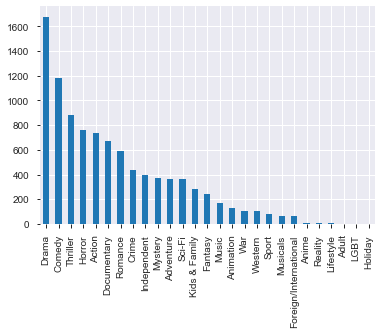

In [20]:
# generes explore, split the genre of each video
gen_split = data['genres'].str.get_dummies(sep=',').sum()
print(gen_split)

gen_split.sort_values(ascending=False).plot.bar()

<AxesSubplot:>

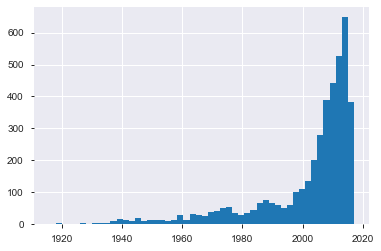

In [22]:
data['release_year'].hist(bins = 50)

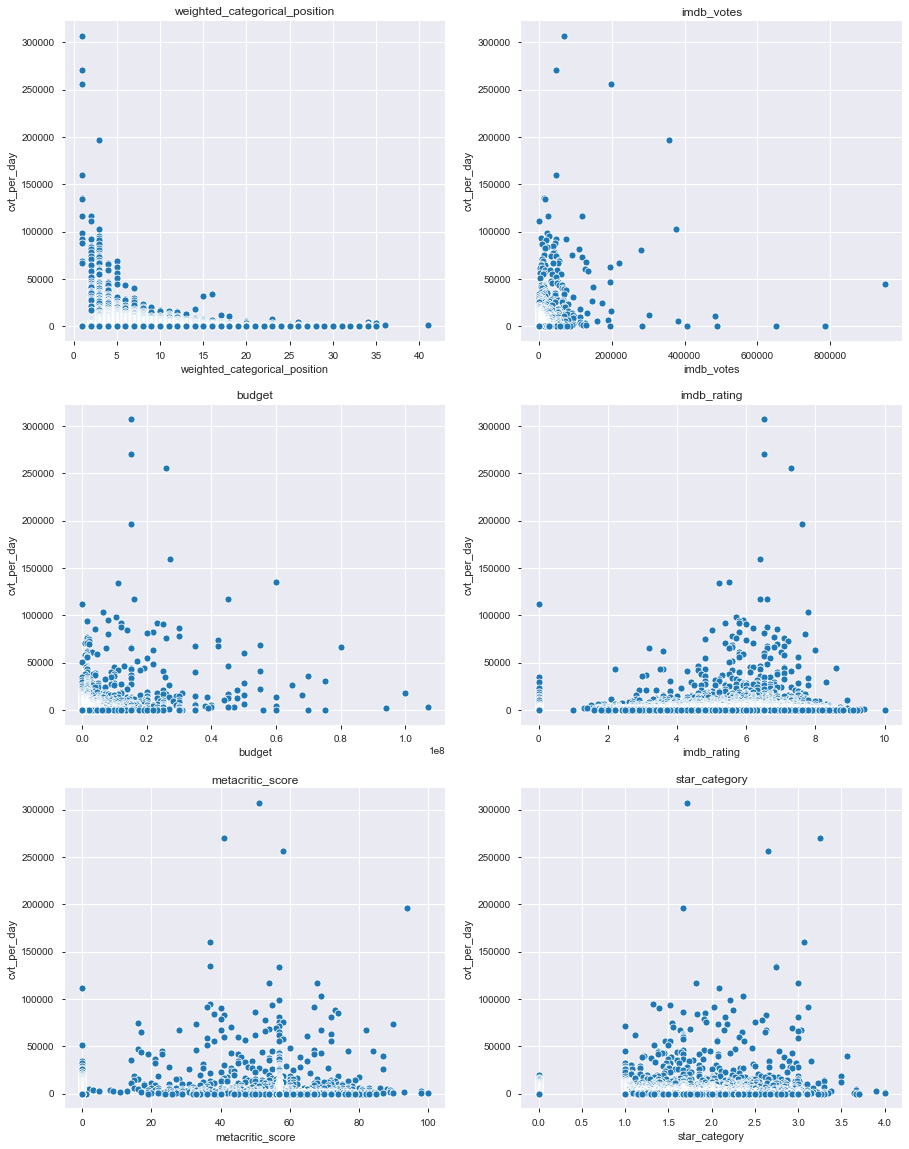

In [28]:
# Add scatterplot for each numeric columns to cvt per day to see if there is any trend
fig, ax = plt.subplots(3,2,figsize = (15,20))
col = ['weighted_categorical_position', 'imdb_votes', 'budget', 'imdb_rating', 'metacritic_score', 'star_category']
for i, j in zip(col, ax.flatten()):
    sns.scatterplot(x = data[i] ,y = data['cvt_per_day'], ax = j)
    j.set_title(i)

They do not show strong linear trends despite the correlation appears to be non-negative. 

## 3. Feature Engineer

### 3.1 There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 
1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.
2. The release_year is binned into 10 buckets based on the year range between 1917 and 2017.

In [30]:
# Convert 3 Categorical variables into dummy variables
d_import_id = pd.get_dummies(data['import_id'], drop_first = True).astype(np.int64)
d_mpaa = pd.get_dummies(data['mpaa'], drop_first = True).astype(np.int64)
d_awards = pd.get_dummies(data['awards'], drop_first = True).astype(np.int64)

In [31]:
# Convert 'genres' into dummy variables
d_genres=data['genres'].str.get_dummies(sep=',').astype(np.int64)
d_genres['Misc_genres']=d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [33]:
print(data['release_year'].min())
print(data['release_year'].max())
data['release_year'].quantile([0.2,0.4,0.6,0.8])

1916
2017


0.2    1991.0
0.4    2006.0
0.6    2010.0
0.8    2013.0
Name: release_year, dtype: float64

In [36]:
# bin release_year and convert into dummies
bin_year = [1916, 1991, 2006, 2010, 2013,2017]
year_range = ['1916-1991', '1991-2006','2006-2010','2010-2013','2013-2017']
year_bin = pd.cut(data['release_year'], bins = bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin, drop_first = True).astype(np.int64)

In [38]:
# new dataframe, drop the previous categorical features, add new dummy variables, check for null

temp_data=data.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)

data_ready = pd.concat([temp_data, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)


In [39]:
data_ready.head(3)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1991-2006,2006-2010,2010-2013,2013-2017
0,385504,307127.605608,1,3,69614,15000000,42930462,6.5,112.301017,51,...,0,0,1,0,0,0,0,0,1,0
1,300175,270338.426375,1,3,46705,15000000,3301046,6.5,94.983250,41,...,0,0,1,0,0,0,0,0,1,0
2,361899,256165.867446,1,3,197596,26000000,37397291,7.3,115.763675,58,...,0,0,0,0,0,0,0,0,1,0


### 3.2 Missing Data
Among the 10 numerical features (not include video_id), 4 features have over 25% of missing values (shown as '0', which is not possible in reality): budget, boxoffice, metacritic_score, star_category. 2 features have less than 10% of missing data: imdb_votes, imdb_rating.

Right Now we have to deal with the missing data. According to the data info, there is no Null value in our dataset. That's good, but we have to be catious, cause zero value can be a very good candidate for missing data. So we have the check the ratio of zero value in our numeric feature.

In [40]:
# change the 0 values to missing
data_ready[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = data_ready[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)
data_ready.isna().sum()/data_ready.shape[0]

video_id                         0.000000
cvt_per_day                      0.000000
weighted_categorical_position    0.000000
weighted_horizontal_poition      0.000000
imdb_votes                       0.081401
budget                           0.580691
boxoffice                        0.755797
imdb_rating                      0.081401
duration_in_mins                 0.000000
metacritic_score                 0.712731
star_category                    0.436820
mgm                              0.000000
other                            0.000000
paramount                        0.000000
NC-17                            0.000000
NotRated                         0.000000
PG                               0.000000
PG-13                            0.000000
R                                0.000000
Golden Globe                     0.000000
Oscar                            0.000000
no award                         0.000000
other award                      0.000000
Action                           0

In [43]:
data_new = data_ready.copy()
data_new['metacritic_score']=data_new['metacritic_score'].fillna(data_new['metacritic_score'].mean())
data_new['star_category']=data_new['star_category'].fillna(data_new['star_category'].median())
data_new['imdb_votes']=data_new['imdb_votes'].fillna(data_new['imdb_votes'].median())
data_new['imdb_rating']=data_new['imdb_rating'].fillna(data_new['imdb_rating'].median())
data_new['budget']=data_new['budget'].fillna(data_new['budget'].median())
data_new.drop(['boxoffice'], axis = 1, inplace = True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 48 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
imdb_votes                       4226 non-null float64
budget                           4226 non-null float64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null float64
star_category                    4226 non-null float64
mgm                              4226 non-null int64
other                            4226 non-null int64
paramount                        4226 non-null int64
NC-17                            4226 non-null int64
NotRated                         4226 non-null int64
PG                               4226 non-null int64
PG-13                          

## 2.3 Feature Scaling

In [44]:
X = data_new.drop(['video_id','cvt_per_day'], axis = 1)
y = data_new['cvt_per_day']

In [46]:
# MinMax scaling
from sklearn.preprocessing import MinMaxScaler
mm_scale = MinMaxScaler()
X_scale = mm_scale.fit_transform(X)


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_scale, y, test_size=0.2)

# 3. Build Model

## 3.1 Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [55]:
from sklearn.metrics import r2_score,mean_squared_error
rmse = mean_squared_error(y_test,dt_pred)


In [130]:
cols = ['Model', 'Root Mean Square Error']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)
dt_metrics = pd.Series({'Model': 'Decision Tree Regressor',
                        'R Square' : str(round(r2_score(y_test,dt_pred)* 100,2) ) + '%',
                        'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,dt_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(dt_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%


## 3.2 Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [131]:
rf_metrics = pd.Series({'Model': 'Random Forest Regressor',
                        'R Square' : str(round(r2_score(y_test,rf_pred)* 100,2) ) + '%',
                        'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,rf_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%
1,Random Forest Regressor,8925.19,49.61%


## 3.3 Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [132]:
lr_metrics = pd.Series({'Model': 'Linear Regression',
                        'R Square' : str(round(r2_score(y_test,lr_pred)* 100,2) ) + '%',
                        'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,lr_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(lr_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%
1,Random Forest Regressor,8925.19,49.61%
2,Linear Regression,10209.29,34.07%


## 3.4 Gradient Boosting Regressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [133]:
gbr_metrics = pd.Series({'Model': 'Gradient Boosting Regressor',
                         'R Square' : str(round(r2_score(y_test,gbr_pred)* 100,2) ) + '%',
                        'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,gbr_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(gbr_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%
1,Random Forest Regressor,8925.19,49.61%
2,Linear Regression,10209.29,34.07%
3,Gradient Boosting Regressor,9155.79,46.98%


## 3.5 AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
abr_pred = abr.predict(X_test)

In [134]:
abr_metrics = pd.Series({'Model': 'AdaBoosting Regressor',
                         'R Square' : str(round(r2_score(y_test,abr_pred)* 100,2) ) + '%',
                        'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,abr_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(abr_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%
1,Random Forest Regressor,8925.19,49.61%
2,Linear Regression,10209.29,34.07%
3,Gradient Boosting Regressor,9155.79,46.98%
4,AdaBoosting Regressor,10904.09,24.79%


## 4. GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

In [89]:
# Create GridSearch function
def grid_search_wrapper(model, parameters):
    """
    fits a GridSearchCV classifier using refit_score for optimization(refit on the best model according to refit_score)
    prints classifier performance metrics
    """

    grid_search = GridSearchCV(model, parameters, cv=3, n_jobs = -1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)
        
    print(grid_search.best_params_)
    print('---------------------------------------')
    print("\t%s: %r" % ("Root Mean Square Error is: ", np.sqrt(mean_squared_error(y_test,y_pred))))#string to int

    return grid_search

### 4.1 GridSearch on Decision Tree

In [85]:
dt_param = {"criterion": ["mse"],
            "min_samples_split": [10, 20, 40],
            "max_depth": [2, 6, 8],
            "min_samples_leaf": [10, 20, 40],
            "max_leaf_nodes": [5, 20, 100]
        }
dt = DecisionTreeRegressor()

In [90]:
dt_grid = grid_search_wrapper(dt, dt_param)

{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 10, 'min_samples_split': 40}
---------------------------------------
	Root Mean Square Error is: : 8229.264746506924


In [87]:
dt_grid_pred = dt_grid.predict(X_test)

In [135]:
dt_grid_metrics = pd.Series({'Model': 'GridSearch on Decision Tree',
                             'R Square' : str(round(r2_score(y_test,dt_grid_pred)* 100,2) ) + '%',
                             'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,dt_grid_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(dt_grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%
1,Random Forest Regressor,8925.19,49.61%
2,Linear Regression,10209.29,34.07%
3,Gradient Boosting Regressor,9155.79,46.98%
4,AdaBoosting Regressor,10904.09,24.79%
5,GridSearch on Decision Tree,8229.26,57.17%


### 4.2 Grid Search on RandomFroest Regressor

In [95]:
rf_param = ({
            "n_estimators": [50, 100, 200],
            "min_samples_split": [5, 10, 20],
            "max_depth": [2, 8, 16],
            "min_samples_leaf": [1, 5],
            "max_leaf_nodes": [5, 20],
            'max_features' : ['auto', 'sqrt']
})
rf = rf = RandomForestRegressor()

In [96]:
rf_grid = grid_search_wrapper(rf, rf_param)

{'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
---------------------------------------
	Root Mean Square Error is: : 8827.400316094328


In [97]:
rf_grid_pred = rf_grid.predict(X_test)

In [136]:
rf_grid_metrics = pd.Series({'Model': 'GridSearch on Random Forest',
                             'R Square' : str(round(r2_score(y_test,rf_grid_pred)* 100,2) ) + '%',
                        'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,rf_grid_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(rf_grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%
1,Random Forest Regressor,8925.19,49.61%
2,Linear Regression,10209.29,34.07%
3,Gradient Boosting Regressor,9155.79,46.98%
4,AdaBoosting Regressor,10904.09,24.79%
5,GridSearch on Decision Tree,8229.26,57.17%
6,GridSearch on Random Forest,8827.40,50.71%


### 4.3 Grid Search on GradientBoosting

In [101]:
gbr_param={
    'criterion' : ['mse'],
    'n_estimators':[50, 100, 200], 
    'learning_rate': [0.1, 0.05, 0.02, 0.01], 
    'max_depth':[2, 8, 16], 
    'min_samples_leaf':[1, 5 ], 
    "min_samples_split": [5, 10, 20],
    'max_features':['auto', 'sqrt'] 
    } 
gbr = GradientBoostingRegressor()

In [102]:
gbr_grid = grid_search_wrapper(gbr, gbr_param)

{'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
---------------------------------------
	Root Mean Square Error is: : 8926.50345261864


In [103]:
gbr_grid_pred = gbr_grid.predict(X_test)

In [137]:
gbr_grid_metrics = pd.Series({'Model': 'GridSearch on GradientBoosting',
                              'R Square' : str(round(r2_score(y_test,gbr_grid_pred)* 100,2) ) + '%',
                        'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,gbr_grid_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(gbr_grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%
1,Random Forest Regressor,8925.19,49.61%
2,Linear Regression,10209.29,34.07%
3,Gradient Boosting Regressor,9155.79,46.98%
4,AdaBoosting Regressor,10904.09,24.79%
5,GridSearch on Decision Tree,8229.26,57.17%
6,GridSearch on Random Forest,8827.40,50.71%
7,GridSearch on GradientBoosting,8926.50,49.6%


### 4.4 Grid Search on AdaBoosting

In [110]:
ada_param = {
     'n_estimators': [50, 100, 200],
     'learning_rate' : [0.01, 0.05, 0.1, 0.5],
    'loss' : ['linear', 'square', 'exponential']
 }
adr = AdaBoostRegressor()

In [111]:
ada_grid = grid_search_wrapper(adr, ada_param)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}
---------------------------------------
	Root Mean Square Error is: : 9866.572046761248


In [115]:
ada_grid_pred = ada_grid.predict(X_test)

In [138]:
ada_grid_metrics = pd.Series({'Model': 'GridSearch on AdaBoosting',
                              'R Square' : str(round(r2_score(y_test,ada_grid_pred)* 100,2) ) + '%',
                        'Root Mean Square Error': round(np.sqrt(mean_squared_error(y_test,ada_grid_pred)),2)})
# appending our result table
result_tabulation = result_tabulation.append(ada_grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,Root Mean Square Error,R Square
0,Decision Tree Regressor,10113.65,35.3%
1,Random Forest Regressor,8925.19,49.61%
2,Linear Regression,10209.29,34.07%
3,Gradient Boosting Regressor,9155.79,46.98%
4,AdaBoosting Regressor,10904.09,24.79%
5,GridSearch on Decision Tree,8229.26,57.17%
6,GridSearch on Random Forest,8827.40,50.71%
7,GridSearch on GradientBoosting,8926.50,49.6%
8,GridSearch on AdaBoosting,9866.57,38.43%


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

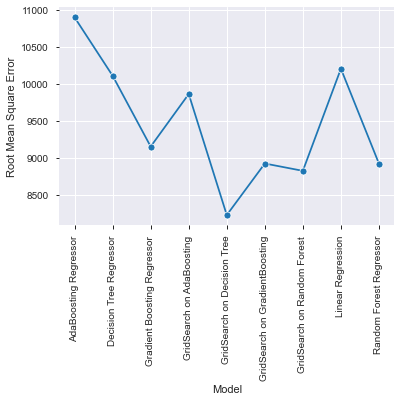

In [169]:
sns.lineplot(x = 'Model', y = 'Root Mean Square Error', data = result_tabulation, marker = "o")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'GridSearch GradientBoosting features importance:')

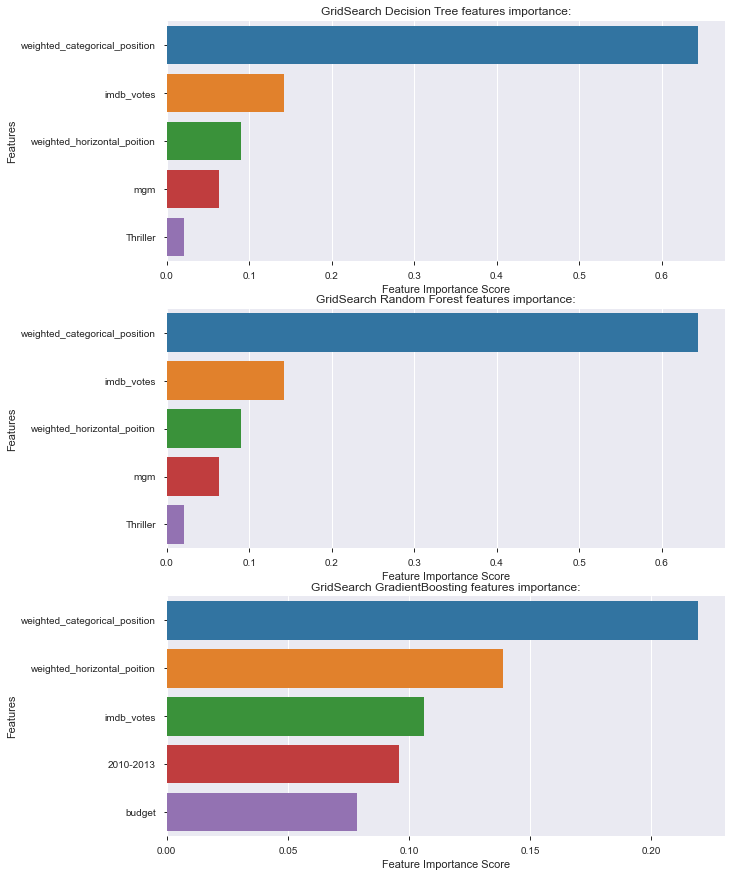

In [161]:
# plot feature importance for top 4 models based on f1-score
fig = plt.figure(figsize = (10, 15))
# features importance for catboost
ax0=fig.add_subplot(311)
grid_dt_importance = dt_grid.best_estimator_.feature_importances_
feature_imp = pd.Series(grid_dt_importance,index=X.columns).sort_values(ascending=False)[:5]
sns.barplot(x=feature_imp, y=feature_imp.index, ax = ax0)
ax0.set_xlabel('Feature Importance Score')
ax0.set_ylabel('Features')
ax0.set_title("GridSearch Decision Tree features importance:")

# features importance for Catboost
ax1=fig.add_subplot(312)
grid_rf_importance = rf_grid.best_estimator_.feature_importances_
feature_imp = pd.Series(grid_dt_importance,index=X.columns).sort_values(ascending=False)[:5]
sns.barplot(x=feature_imp, y=feature_imp.index, ax = ax1)
ax1.set_xlabel('Feature Importance Score')
ax1.set_ylabel('Features')
ax1.set_title("GridSearch Random Forest features importance:")

# features importance for random forest
ax2=fig.add_subplot(313)
gird_gbr_importance = gbr_grid.best_estimator_.feature_importances_
feature_imp = pd.Series(gird_gbr_importance,index=X.columns).sort_values(ascending=False)[:5]
sns.barplot(x=feature_imp, y=feature_imp.index, ax = ax2)
ax2.set_xlabel('Feature Importance Score')
ax2.set_ylabel('Features')
ax2.set_title("GridSearch GradientBoosting features importance:")


In [171]:
print(data['weighted_categorical_position'].min())
print(data['weighted_categorical_position'].max())
data['weighted_categorical_position'].quantile([0.2,0.4,0.6,0.8])

1
41


0.2     4.0
0.4     5.0
0.6     7.0
0.8    10.0
Name: weighted_categorical_position, dtype: float64

In [200]:
# bin catorical positions 
data_position = data.copy()
bin_position = [0, 4, 5, 7, 10, 41]
position_range = ['Top Position', 'Second Position','Third Position','Forth Position','Last Position']
data_position['position'] = pd.cut(data['weighted_categorical_position'], bins = bin_position, labels=position_range)

In [202]:
data_position.groupby('position')['cvt_per_day'].mean()

position
Top Position       6898.572838
Second Position    3913.829444
Third Position     3272.106955
Forth Position     2693.011906
Last Position      1574.656447
Name: cvt_per_day, dtype: float64

<AxesSubplot:xlabel='position', ylabel='cvt_per_day'>

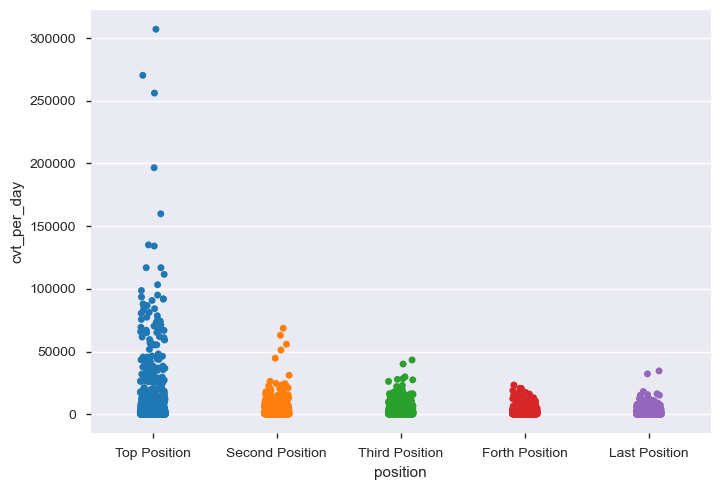

In [203]:
sns.stripplot(x='position', y='cvt_per_day', data=data_position, jitter=True)